In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")


IMPORTING DATA SET

In [2]:
netflix = pd.read_csv('netflix_data.csv')

In [25]:
#DISPLAYING FIRST 5 ROWS OF DATASET
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,Tv Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,123,A brilliant group of students become card-coun...,Dramas


HANDLING MISSING VALUES

In [26]:
#COUNTING FOR NUMBER OF MISSING OR NULL VALUES
netflix.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      98
release_year     0
duration         0
description      0
genre            0
dtype: int64

In [27]:
#FILLING NULL VALUE WITH GENERIC TERMS
netflix['director'].fillna('Unknown', inplace = True)
netflix['cast'].fillna('Unknown', inplace = True)
netflix['country'].fillna('Unknown', inplace = True)
netflix['date_added'] = pd.to_datetime(netflix['date_added'], errors='coerce')

In [22]:
netflix.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      98
release_year     0
duration         0
description      0
genre            0
dtype: int64

In [ ]:
netflix.duplicated().sum()


In [23]:
#Normalizing Categorical Values
netflix['type'] = netflix['type'].str.strip().str.title()

In [4]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'description', 'genre'],
      dtype='object')

In [24]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7787 non-null   object        
 1   type          7787 non-null   object        
 2   title         7787 non-null   object        
 3   director      7787 non-null   object        
 4   cast          7787 non-null   object        
 5   country       7787 non-null   object        
 6   date_added    7689 non-null   datetime64[ns]
 7   release_year  7787 non-null   int32         
 8   duration      7787 non-null   int64         
 9   description   7787 non-null   object        
 10  genre         7787 non-null   object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(8)
memory usage: 638.9+ KB


TREND ANALYSIS

In [39]:
#COUNTING THE NUMBER OF RELEASES YEARLY
yearly_release = netflix['release_year'].value_counts().sort_index()
yearly_release.tail(35)

release_year
1987       7
1988      16
1989      13
1990      20
1991      17
1992      18
1993      22
1994      16
1995      19
1996      19
1997      30
1998      31
1999      33
2000      34
2001      36
2002      45
2003      49
2004      59
2005      73
2006      85
2007      85
2008     125
2009     137
2010     173
2011     166
2012     219
2013     267
2014     334
2015     541
2016     882
2017    1012
2018    1121
2019     996
2020     868
2021      31
Name: count, dtype: int64

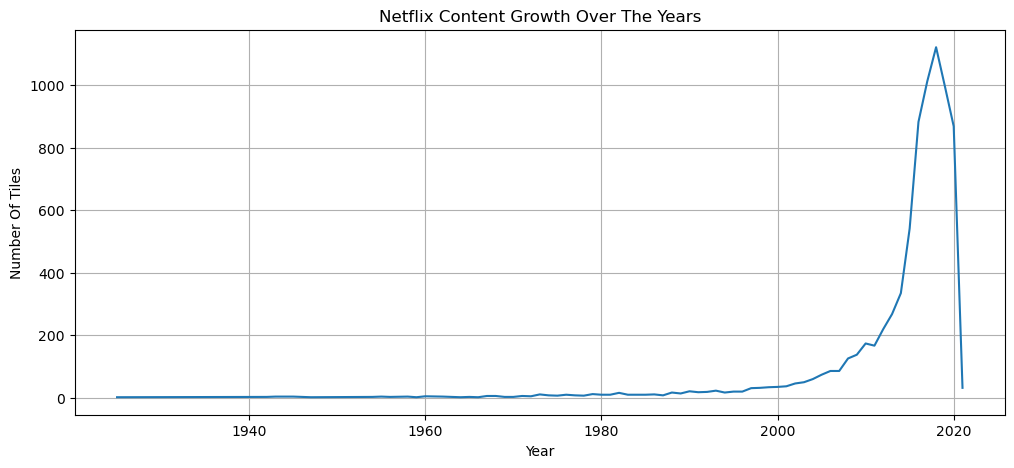

In [40]:
#VISUALIZING CONTENT GROWTH OVER THE YEARS

plt.figure(figsize = (12,5))
plt.plot(yearly_release.index, yearly_release.values, linestyle='-')
plt.xlabel('Year')
plt.ylabel('Number Of Tiles')
plt.title('Netflix Content Growth Over The Years')
plt.grid()
plt.show()

In [85]:
genre_years = netflix[['genre', 'release_year']].value_counts().reset_index(name='count')
genre_years

,genre,release_year,count
0,Dramas,2018,199
1,Dramas,2017,190
2,Dramas,2016,184
3,Documentaries,2017,165
4,Dramas,2019,148
...,...,...,...
636,Classic Movies,1969,1
637,Classic Movies,1968,1
638,LGBTQ Movies,2018,1
639,Music,2008,1


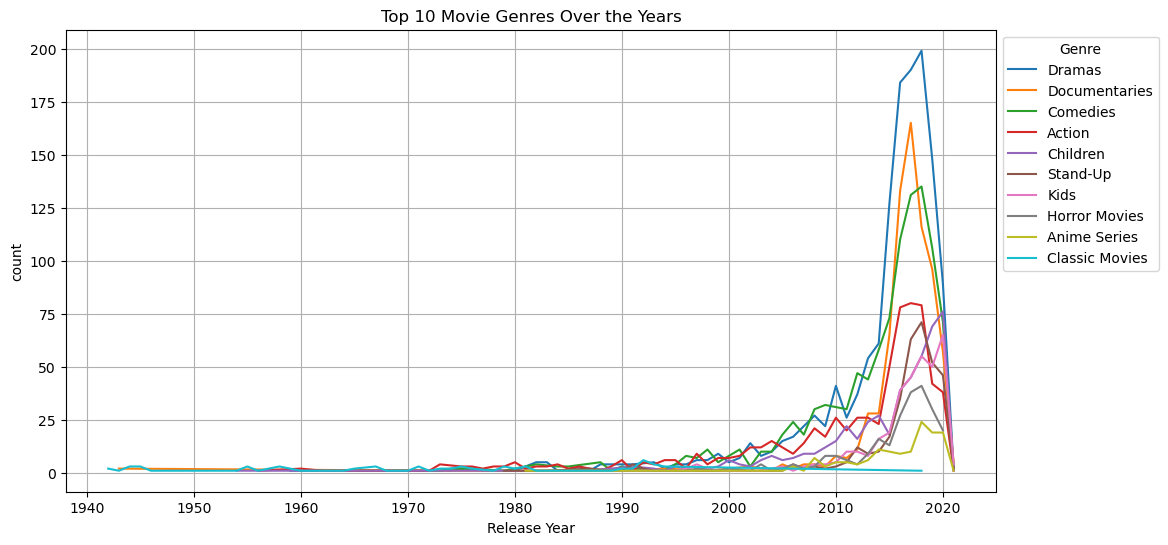

In [117]:
#VISUALIZING CONTENT GROWTH OVER THE YEARS FOR TOP TEN GENRES

# Get the top 10 genres
genres_trends = genre_years['genre'].value_counts().head(10).index

top_genres_trends = genre_years[genre_years['genre'].isin(genres_trends)]

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_genres_trends, x='release_year', y='count', hue='genre')

# Customize
plt.xlabel("Release Year")
plt.title("Top 10 Movie Genres Over the Years")
plt.legend(title="Genre", bbox_to_anchor=(1, 1))  # Moves legend outside
plt.grid(True)

# Show plot
plt.show()


DURATION INSIGHTS

In [130]:
#SUBSETTING TYPES AND THEIR RUNTIMES
show_runtime =  netflix[['type', 'duration']]
show_runtime

,type,duration
0,Tv Show,4
1,Movie,93
2,Movie,78
3,Movie,80
4,Movie,123
...,...,...
7782,Movie,99
7783,Movie,111
7784,Movie,44
7785,Tv Show,1


In [127]:
#CALCULATING AVERAGE RUTIME OF BOTH TYPES
avg_runtime = show_runtime.groupby('type')['duration'].agg(['mean', 'median'])
avg_runtime

,mean,median
type,,
Movie,99.307978,98.0
Tv Show,1.775934,1.0


In [128]:
norm_runtimes = show_runtime[(show_runtime['duration'] >1.8) & (show_runtime['duration']<100)]
norm_runtimes

,type,duration
0,Tv Show,4
1,Movie,93
2,Movie,78
3,Movie,80
6,Movie,95
...,...,...
7780,Movie,94
7781,Movie,88
7782,Movie,99
7784,Movie,44


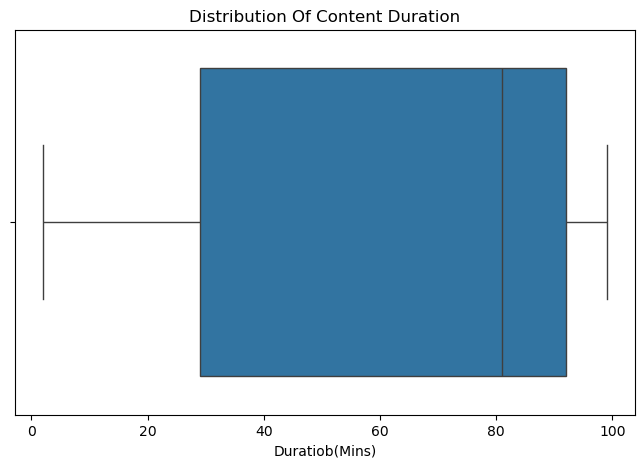

In [78]:
plt.figure(figsize = (8,5))
sns.boxplot(x=norm_runtimes['duration'])
plt.xlabel('Duratiob(Mins)')
plt.title('Distribution Of Content Duration')
plt.show()

COUNTRY WIDE DISTRIBUTION

In [ ]:
top_countries = netflix.country.value_counts().reset_index()
top_countries.head(10)

,country,count
0,United States,2883
1,India,956
2,United Kingdom,577
3,Unknown,507
4,Canada,259
5,Japan,237
6,France,196
7,South Korea,194
8,Spain,168
9,Mexico,123


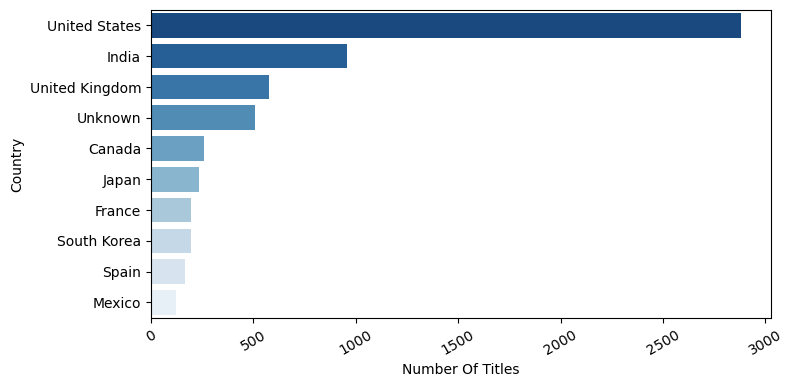

In [93]:
plt.figure(figsize = (8,4))
sns.barplot(data=top_countries.head(10), x='count', y='country', hue='country', palette='Blues_r')
plt.xlabel('Number Of Titles')
plt.ylabel('Country')
plt.xticks(rotation = 30)
plt.show()

GENRE POPULARITY

In [136]:
#TOP 10 GENRES ON NETFLIX
top_genres = netflix['genre'].value_counts().reset_index(name='count')
top_genres.head(10)

,genre,count
0,Dramas,1384
1,Comedies,1074
2,Documentaries,751
3,Action,721
4,International TV,690
5,Children,502
6,Crime TV,369
7,Kids,359
8,Stand-Up,354
9,Horror Movies,244


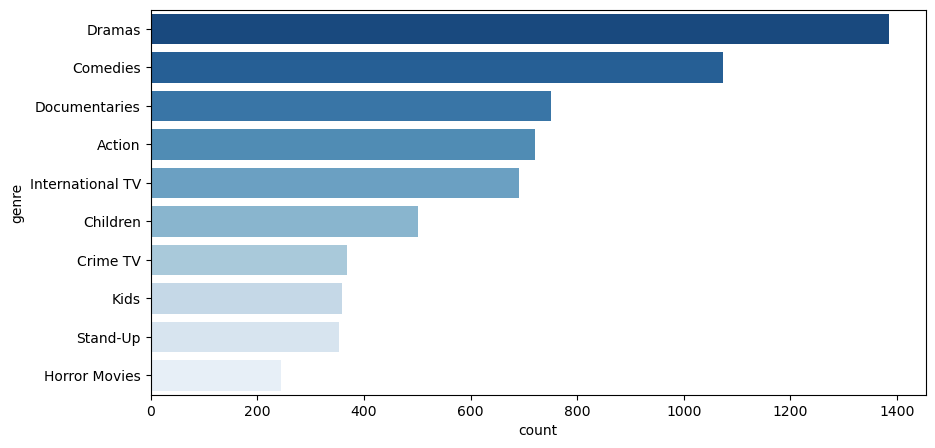

In [ ]:
#VISUALIZATION OF THE TOP 10 GENRES
plt.figure(figsize=(10,5))
sns.barplot(data=top_genres.head(10), x='count', y='genre',hue='genre', palette='Blues_r')
plt.show()

In [168]:
#SUBSETING THE MOST GENRE FOR EACH YEAR
genre_pyear = netflix.groupby('genre')['release_year'].value_counts().reset_index(name='count')
most_watched_gpy = genre_pyear.loc[genre_pyear.groupby('release_year')['count'].idxmax()]
most_watched_gpy.sort_values(by= 'release_year', ascending =  False).head(20)

#gpy = genres per year

,genre,release_year,count
295,Documentaries,2021,5
429,International TV,2020,117
331,Dramas,2019,148
328,Dramas,2018,199
329,Dramas,2017,190
330,Dramas,2016,184
332,Dramas,2015,127
334,Dramas,2014,61
335,Dramas,2013,54
217,Comedies,2012,47


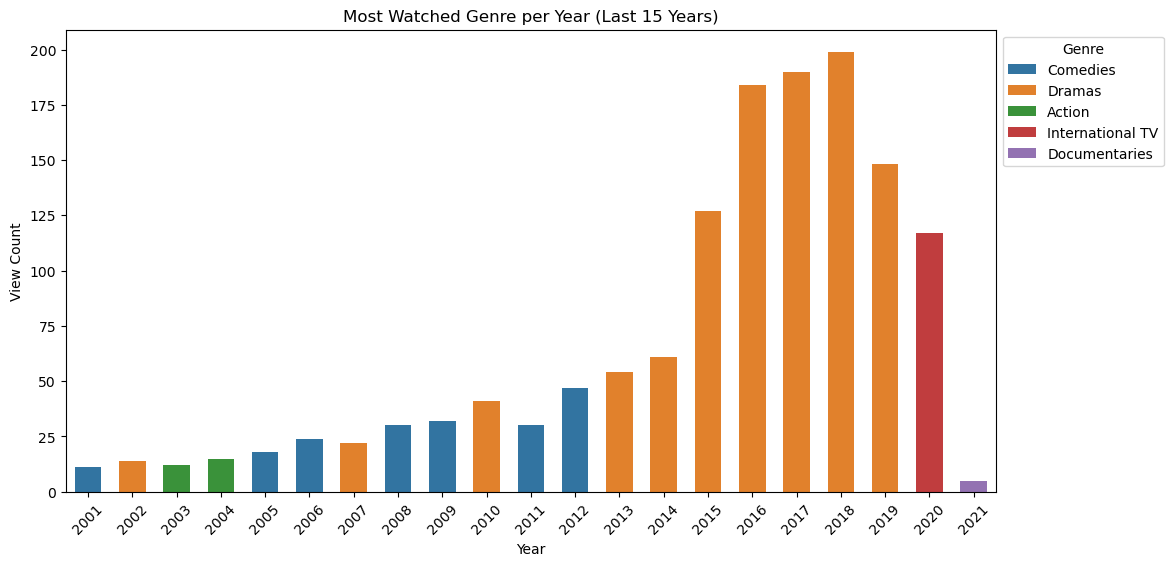

In [189]:
# Find the latest release year
max_year = most_watched_gpy['release_year'].max()

# Filter for the last 15 years
top15_mwgpy = most_watched_gpy[most_watched_gpy['release_year'] >= (max_year - 20)]
#mwgpy = most watched genres per year


# Sort by year for proper ordering
sorted_mwgpy = top15_mwgpy.sort_values(by='release_year')

# Set figure size
plt.figure(figsize=(12, 6))

# Create a bar plot with a distinct color palette
sns.barplot(data=sorted_mwgpy, x='release_year', y='count', hue='genre', width=0.6, palette="tab10" ) # Using a distinct color palette

# Add labels and title
plt.xlabel("Year")
plt.ylabel("View Count")
plt.title("Most Watched Genre per Year (Last 15 Years)")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend(title="Genre", bbox_to_anchor=(1, 1))  # Move legend outside plot

# Show the plot
plt.show()


SPECIAL ANALYSIS OF THE UNITED STATES

In [104]:
#SUBSETTING US RELATED DATA
US_data = netflix[netflix['country'] == 'United States']


#CONVERTING TO A DATAFRAME
USdata_df = pd.DataFrame(US_data, columns=['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'description', 'genre'])


USdata_df.head().sort_index()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,123,A brilliant group of students become card-coun...,Dramas
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,1997,119,After one of his high school students attacks ...,Dramas
10,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,2017-10-20,2017,103,A farmer pens a confession admitting to his wi...,Dramas
14,s15,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,2020-03-19,2019,91,Stranded when the Earth is suddenly destroyed ...,Independent Movies


In [191]:
#COUNTING THE TOP GENRES IN THE US
US_genres = US_data['genre'].value_counts().reset_index()
US_genres.head(10)

,genre,count
0,Documentaries,397
1,Dramas,377
2,Comedies,328
3,Children,290
4,Action,245
5,Stand-Up,238
6,Kids,163
7,Docuseries,118
8,Crime TV,112
9,Horror Movies,111


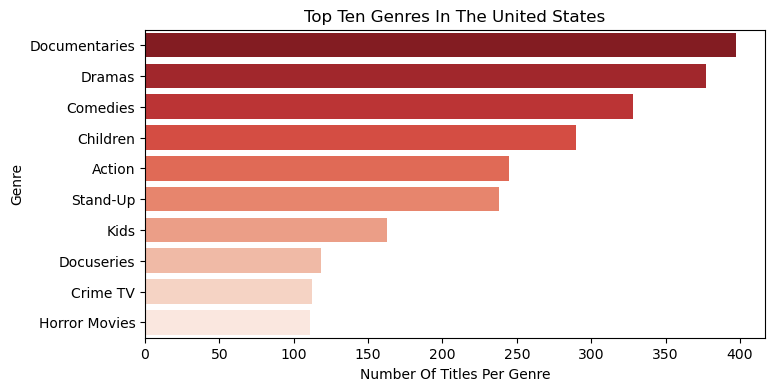

In [192]:
#VISUALIZING THE TOP TEN GENRES IN THE US
plt.figure(figsize=(8,4))
sns.barplot(data=US_genres.head(10), x='count', y='genre', hue='genre', palette='Reds_r')
plt.xlabel('Number Of Titles Per Genre')
plt.ylabel('Genre')
plt.title('Top Ten Genres In The United States')
plt.show()

In [110]:
US_grenre_trends = USdata_df[['genre', 'release_year']].value_counts().reset_index(name='count')
US_grenre_trends

,genre,release_year,count
0,Documentaries,2017,92
1,Documentaries,2018,70
2,Documentaries,2016,67
3,Dramas,2017,54
4,Documentaries,2019,54
...,...,...,...
455,Classic Movies,1969,1
456,Music,2018,1
457,Music,2020,1
458,Reality TV,1993,1


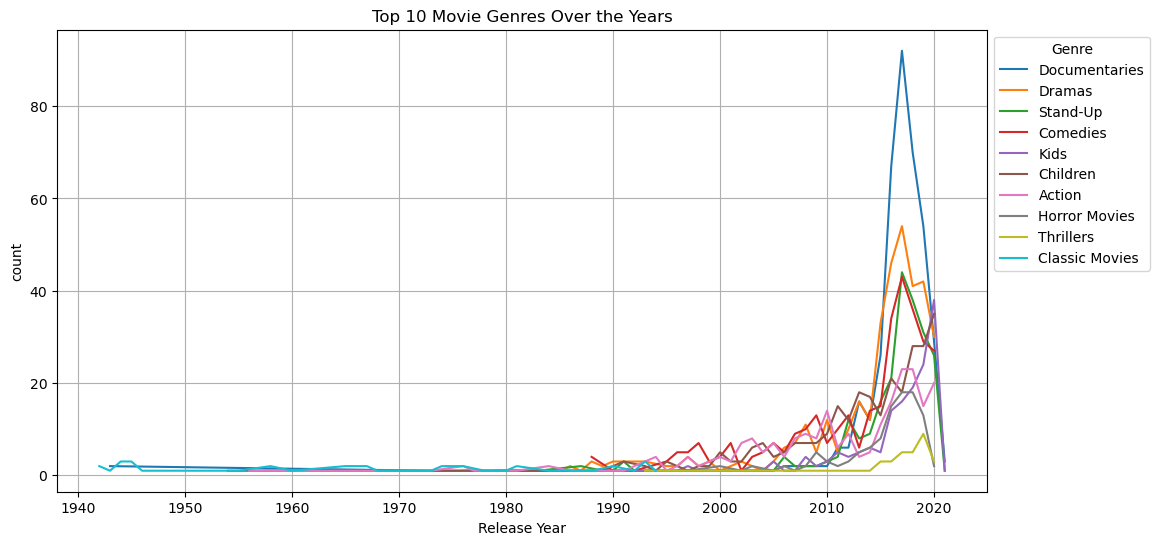

In [115]:
#VISUALIZING CONTENT GROWTH OVER THE YEARS FOR TOP TEN GENRES IN THE US

# Get the top 10 genres
US_top_genres = US_grenre_trends['genre'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 genres
UStopt10_genres = US_grenre_trends[US_grenre_trends['genre'].isin(US_top_genres)]


# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=UStopt10_genres, x='release_year', y='count', hue='genre')

# Customize
plt.xlabel("Release Year")
plt.title("Top 10 Movie Genres Over the Years")
plt.legend(title="Genre", bbox_to_anchor=(1, 1))  # Moves legend outside
plt.grid(True)

# Show plot
plt.show()


In [173]:
#SUBSETING THE MOST GENRE FOR EACH YEAR
USgenre_pyear = USdata_df.groupby('genre')['release_year'].value_counts().reset_index(name='count')
USmost_watched_gpy = USgenre_pyear.loc[USgenre_pyear.groupby('release_year')['count'].idxmax()]
USmost_watched_gpy.head(20)

#gpy = genres per year

,genre,release_year,count
110,Classic Movies,1942,2
195,Documentaries,1943,2
107,Classic Movies,1944,3
108,Classic Movies,1945,3
119,Classic Movies,1946,1
120,Classic Movies,1947,1
83,Children,1954,1
121,Classic Movies,1955,1
29,Action,1956,1
111,Classic Movies,1958,2


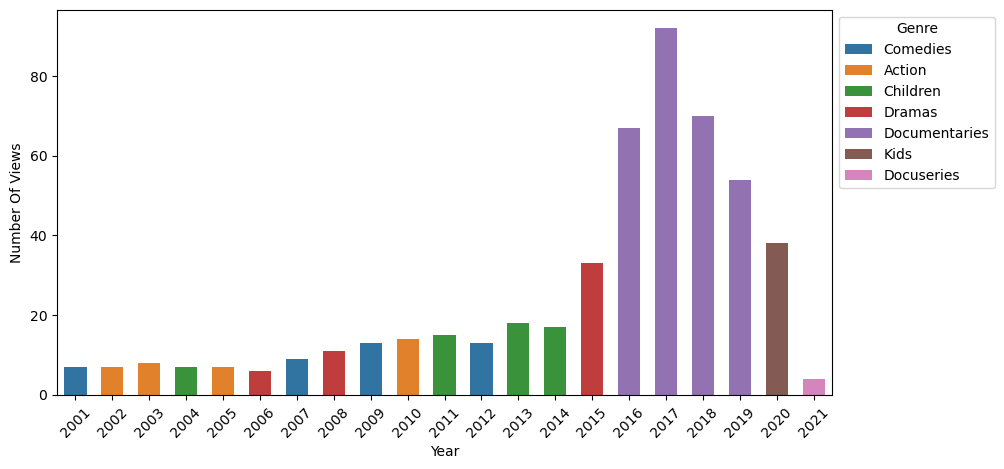

In [193]:
#VISUALIZING THE MOST WATCHED GENRE ON A YEARLY BASIS FOR THE LAST 20 YEARS
US_topmwgpy = USmost_watched_gpy['release_year'].max()

US_top20mwgpy = USmost_watched_gpy[USmost_watched_gpy['release_year'] >= (US_topmwgpy - 20)]


sorted_top20 = US_top20mwgpy.sort_values(by= 'release_year')


plt.figure(figsize = (10,5))
sns.barplot(data=sorted_top20, x='release_year', y='count', hue='genre', palette="tab10", width = 0.6)
plt.xlabel('Year')
plt.ylabel('Number Of Views')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1, 1))
plt.show()